In [40]:
#Ohne Datum
FEATURES = [
    'Temperatur',
    'Windgeschwindigkeit',
    'KielerWoche',

    'WettercodeExtremwetter',
    'WettercodeKlar',
    'WettercodeNachSchlechtemWetter',
    'WettercodeNebel',
    'WettercodeRegen',
    'WettercodeSchnee',

    'WarengruppeBread',
    'WarengruppeRolls',
    'WarengruppeCroissants',
    'WarengruppeConfectionery',
    'WarengruppeCake',
    'WarengruppeSeasonalBread',

    'WochentagFreitag',
    'WochentagSamstag',
    'WochentagSonntag',
    'WochentagUnterDerWoche',

    'Januar',
    'Februar',
    'Maerz',
    'April',
    'Mai',
    'Juni',
    'Juli',
    'August',
    'September',
    'Oktober',
    'November',
    'Dezember',
    
    'BewoelkungWolkenBedeckt',
    'BewoelkungWolkenBewoelkt',
    'BewoelkungWolkenKlar',
    
    'FeiertagChristiHimmelfahrt',
    'FeiertagErsterMai',
    'FeiertagOstermontag',
    'FeiertagPfingstmontag',
    'FeiertagTagDerDeutschenEinheit',
    'FeiertagSilvester',
    'FeiertagHeiligabend',
    'TagVorFeiertag',
    'Fastenzeit'
]



In [3]:
import pandas as pd

In [41]:
train_data = pd.read_csv('../0_DataPreparation/data/data_final/train_data.csv')
val_data = pd.read_csv('../0_DataPreparation/data/data_final/validation_data.csv')
test_data = pd.read_csv('../0_DataPreparation/data/data_final/test_data.csv')

X_train = train_data[FEATURES]
y_train = train_data['Umsatz']

X_val = val_data[FEATURES]
y_val = val_data['Umsatz']

X_test = test_data[FEATURES]


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),

    Dense(128, activation='relu'),
    BatchNormalization(),

    Dense(64, activation='relu'),

    Dense(1)
])


model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss=Huber(delta=50)
)


model.summary()


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,489 (123.00 KB)

 Trainable params: 30,977 (121.00 KB)

 Non-trainable params: 512 (2.00 KB)

In [53]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=6,
    min_lr=1e-5,
    verbose=1
)


In [54]:
history = model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=300,
    batch_size=32,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)


Epoch 1/300


234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8145.9170 - val_loss: 5017.8857 - learning_rate: 5.0000e-04
Epoch 2/300
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2983.9045 - val_loss: 1160.6724 - learning_rate: 5.0000e-04
Epoch 3/300
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1567.9933 - val_loss: 970.8227 - learning_rate: 5.0000e-04
Epoch 4/300
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1411.9498 - val_loss: 954.9469 - learning_rate: 5.0000e-04
Epoch 5/300
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1294.1145 - val_loss: 939.0624 - learning_rate: 5.0000e-04
Epoch 6/300
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1188.0549 - val_loss: 917.3391 - learning_rate: 5.0000e-04
Epoch 7/300
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1130.9650 - val_loss: 904.8141 - learning_rate: 5.0000e-04
Epoch 8/300
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1044.6810 - val_loss: 919.5522 - learning_rate: 5.0000e-04
Epoch 9/300
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/st

In [56]:
test_pred = model.predict(X_test_scaled)

submission = pd.DataFrame({
    'id': test_data['id'],
    'Umsatz': test_pred.flatten()
})

submission.to_csv('../0_DataPreparation/data/submission_nn_02.csv', index=False)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


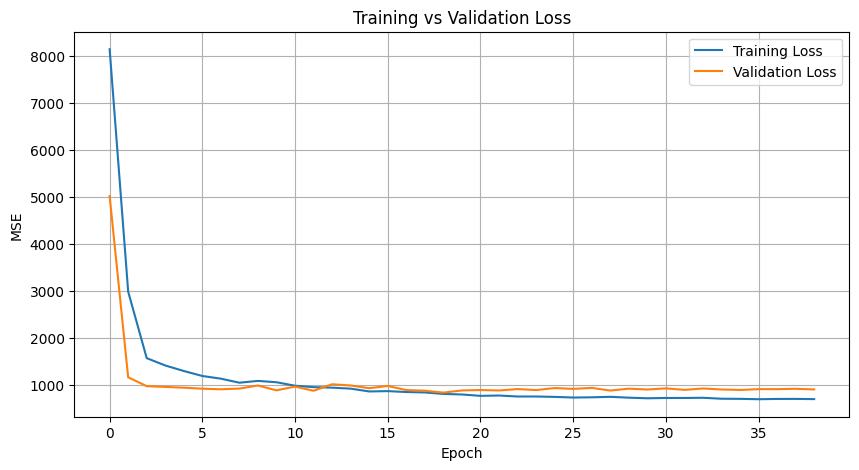

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
val_results = val_data.copy()
val_results['y_true'] = y_val.values
val_results['y_pred'] = model.predict(X_val_scaled).flatten()

for wg in [
    'WarengruppeBread',
    'WarengruppeRolls',
    'WarengruppeCroissants',
    'WarengruppeConfectionery',
    'WarengruppeCake',
    'WarengruppeSeasonalBread'
]:
    subset = val_results[val_results[wg] == 1]
    mape_wg = mape(subset['y_true'], subset['y_pred'])
    print(f"{wg}: {mape_wg:.2f}%")



 1/58 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
WarengruppeBread: 20.58%
WarengruppeRolls: 13.83%
WarengruppeCroissants: 20.10%
WarengruppeConfectionery: 24.47%
WarengruppeCake: 15.58%
WarengruppeSeasonalBread: 54.00%


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Vorhersagen machen
y_train_pred = model.predict(X_train_scaled).flatten()
y_val_pred = model.predict(X_val_scaled).flatten()

# Metriken berechnen
def evaluate_model(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    print(f"\n{dataset_name}:")
    print(f"  MAE:  {mae:.2f} € (durchschnittlicher Fehler)")
    print(f"  RMSE: {rmse:.2f} € (bestraft große Fehler stärker)")
    print(f"  R²:   {r2:.3f} (0-1, höher = besser)")
    print(f"  MAPE: {mape:.2f} % (Fehler in Prozent)")

evaluate_model(y_train, y_train_pred, "Training")
evaluate_model(y_val, y_val_pred, "Validation")

132/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Training:
  MAE:  28.50 € (durchschnittlicher Fehler)
  RMSE: 49.51 € (bestraft große Fehler stärker)
  R²:   0.888 (0-1, höher = besser)
  MAPE: 15.94 % (Fehler in Prozent)

Validation:
  MAE:  32.87 € (durchschnittlicher Fehler)
  RMSE: 49.80 € (bestraft große Fehler stärker)
  R²:   0.854 (0-1, höher = besser)
  MAPE: 19.99 % (Fehler in Prozent)
